In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Read the data**

In [29]:
df=pd.read_csv("/content/Weather Dataset.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            3780 non-null   object 
 1   Summary                   3780 non-null   object 
 2   Precip Type               3780 non-null   object 
 3   Temperature (C)           3780 non-null   float64
 4   Apparent Temperature (C)  3780 non-null   float64
 5   Humidity                  3780 non-null   float64
 6   Wind Speed (km/h)         3780 non-null   float64
 7   Wind Bearing (degrees)    3780 non-null   float64
 8   Visibility (km)           3780 non-null   float64
 9   Loud Cover                3780 non-null   float64
 10  Pressure (millibars)      3780 non-null   float64
 11  Daily Summary             3780 non-null   object 
dtypes: float64(8), object(4)
memory usage: 354.5+ KB


In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000
mean,9.473088,8.909559,0.280862,10.067603,200.250529,8.279035,-0.529101,995.943513
std,33.839341,9.863589,32.543577,6.029814,91.711950,32.992211,32.530002,148.644604
min,-2000.000000,-11.911111,-2000.000000,0.000000,0.000000,-2000.000000,-2000.000000,0.000000
25%,2.102778,-0.401389,0.710000,5.296900,145.000000,5.264700,0.000000,1010.760000
50%,10.250000,10.269444,0.860000,9.418500,192.000000,9.982000,0.000000,1015.180000
75%,17.088889,17.088889,0.930000,13.737325,280.000000,11.270000,0.000000,1023.590000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,0.000000,1042.310000


**Check missing values**

In [ ]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

No missing values

**check duplicates**

In [ ]:
df.duplicated().sum()

1259

In [30]:
df.drop_duplicates(inplace=True)

**Drop unimportant columns**

In [ ]:
df['Loud Cover'].value_counts()

Loud Cover
 0.0       2520
-2000.0       1
Name: count, dtype: int64

In [31]:
df.drop(columns='Loud Cover',inplace=True)  #not useful

**Check Outliers and incorrect data**

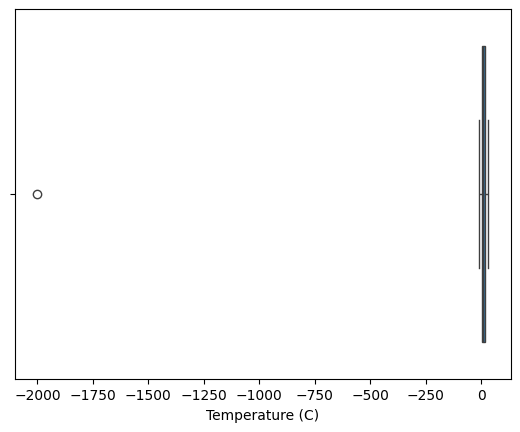

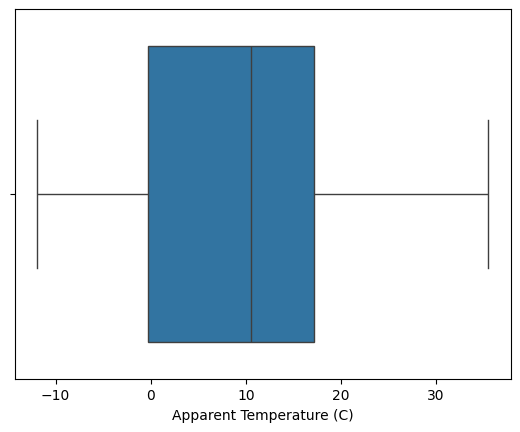

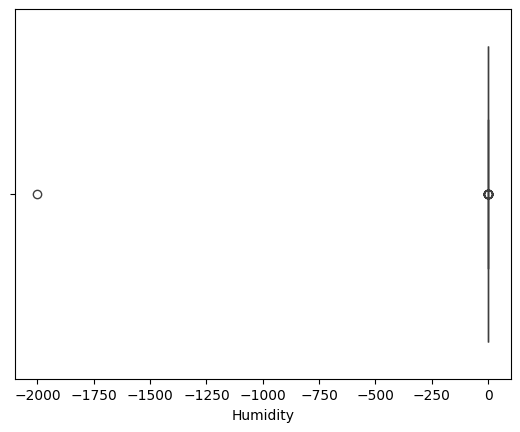

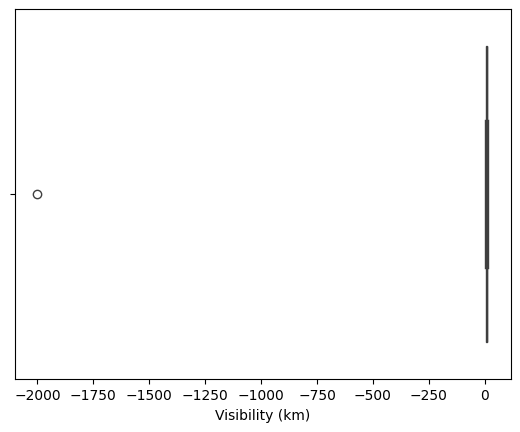

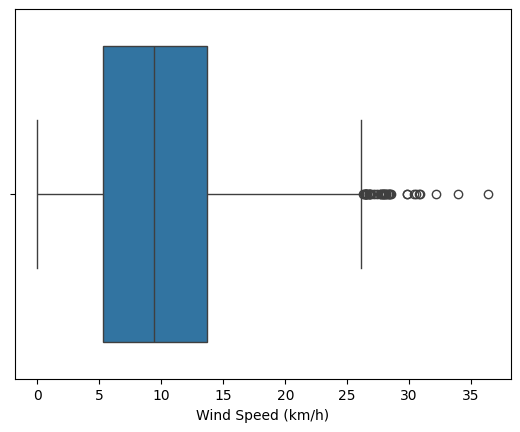

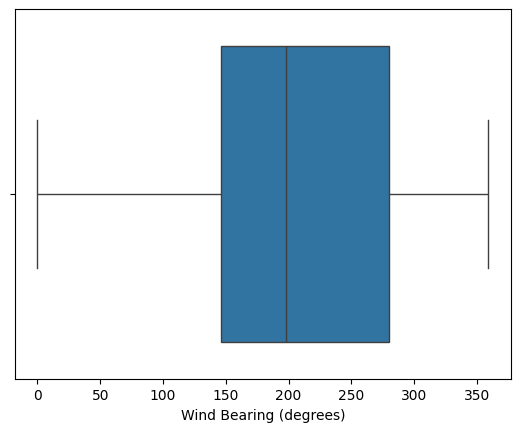

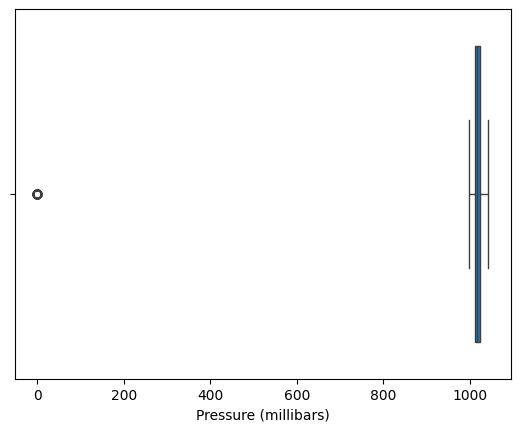

In [ ]:
columns=['Temperature (C)','Apparent Temperature (C)','Humidity','Visibility (km)','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']
for i in columns:
  sns.boxplot(x=df[i])
  plt.show()

In [32]:
columns=['Temperature (C)','Humidity','Visibility (km)','Wind Speed (km/h)','Pressure (millibars)']
for column in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


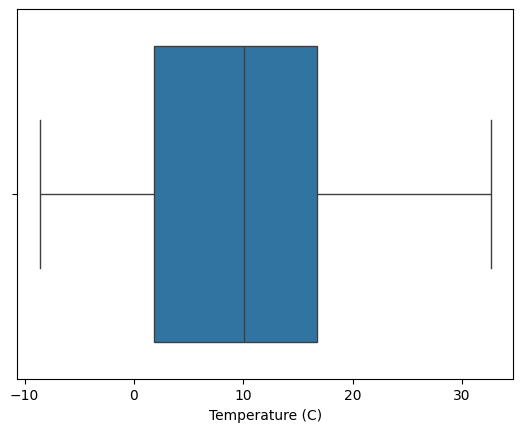

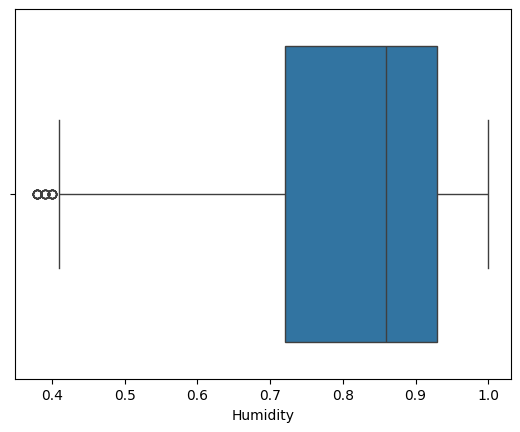

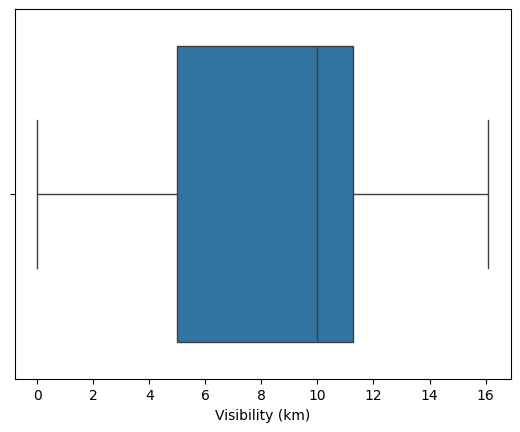

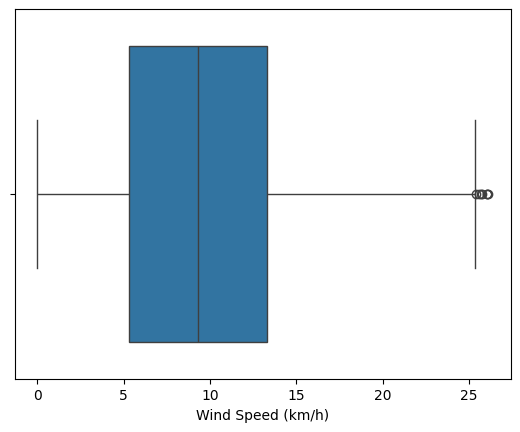

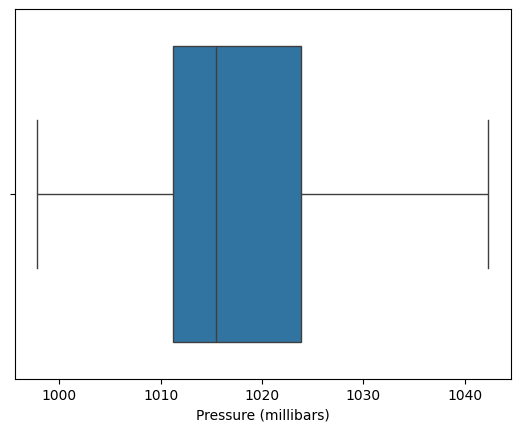

In [ ]:
columns=['Temperature (C)','Humidity','Visibility (km)','Wind Speed (km/h)','Pressure (millibars)']
for i in columns:
  sns.boxplot(x=df[i])
  plt.show()

In [33]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000
mean,9.853914,8.766032,0.813304,9.706669,200.051059,8.765631,1018.155284
std,8.783066,9.898790,0.157162,5.508259,91.144774,4.613336,9.848783
min,-8.594444,-11.911111,0.380000,0.000000,0.000000,0.000000,997.850000
25%,1.816667,-0.511111,0.720000,5.280800,144.000000,4.991000,1011.180000
50%,10.066667,10.066667,0.860000,9.305800,193.000000,9.982000,1015.480000
75%,16.733333,16.733333,0.930000,13.330800,280.000000,11.270000,1023.830000
max,32.638889,35.494444,1.000000,26.130300,359.000000,16.100000,1042.310000


In [ ]:
df['Formatted Date'].value_counts()

Formatted Date
2006-04-01 00:00:00.000 +0200    1
2006-12-19 02:00:00.000 +0100    1
2006-12-19 04:00:00.000 +0100    1
2006-12-19 05:00:00.000 +0100    1
2006-12-19 06:00:00.000 +0100    1
                                ..
2006-08-14 01:00:00.000 +0200    1
2006-08-14 02:00:00.000 +0200    1
2006-08-14 03:00:00.000 +0200    1
2006-08-14 04:00:00.000 +0200    1
2006-02-20 23:00:00.000 +0100    1
Name: count, Length: 2409, dtype: int64

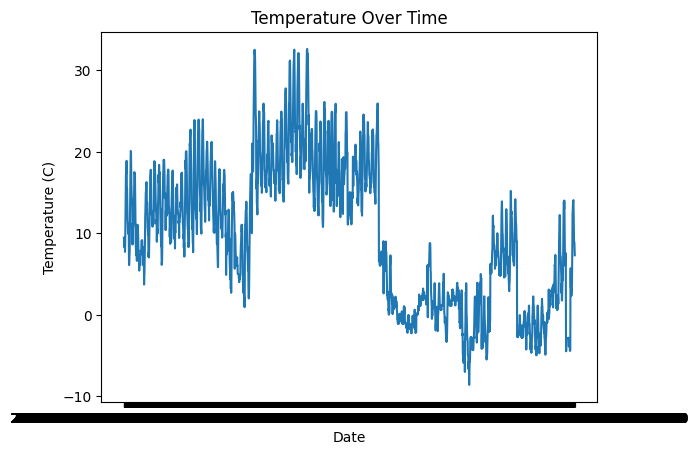

In [34]:
plt.plot(df['Formatted Date'],df['Temperature (C)'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

Text(0.5, 1.0, 'Temperature (C) Distribution')

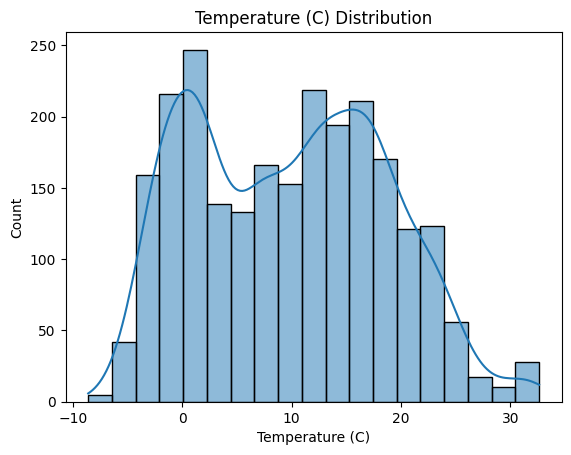

In [35]:
sns.histplot(df['Temperature (C)'],kde = True)
plt.title('Temperature (C) Distribution')

Text(0.5, 1.0, 'Temperature (C) VS Humidity')

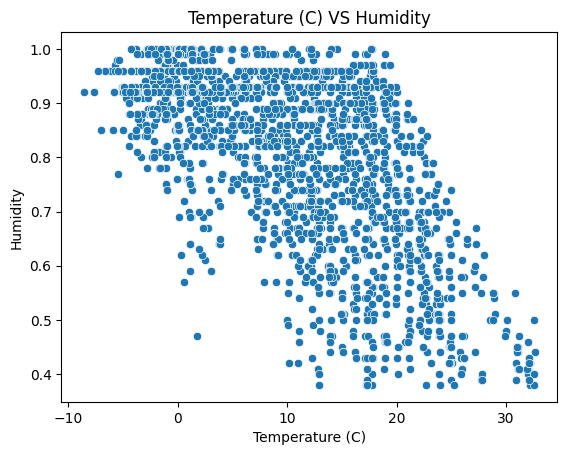

In [37]:
sns.scatterplot(x=df['Temperature (C)'],y=df['Humidity'])
plt.title('Temperature (C) VS Humidity')

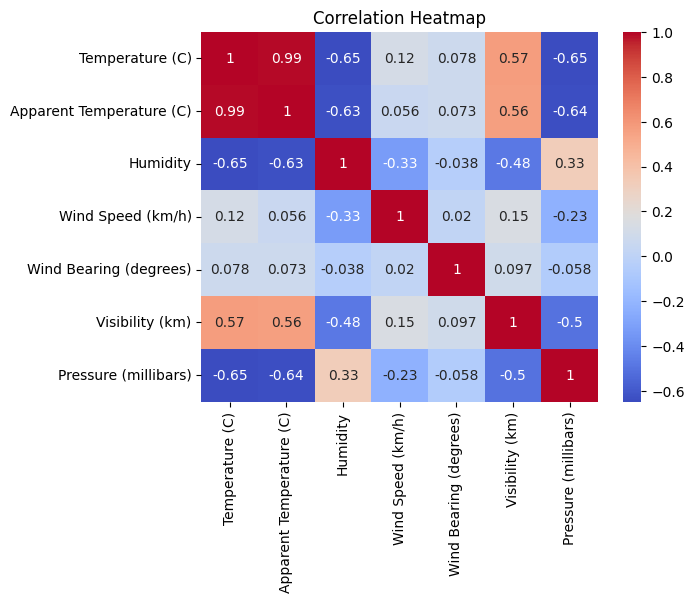

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Temperature Vs Apparent Temperature , have strong postive correlation coeff = 0.99 it might be unnecessary to include both variables in your analysis, to prevent multi collinearity

---
Values close to 0 indicate no linear relationship between the variables like wind speed vs wind bearing

---
Pressure Vs Visibility ,the correlation coefficient is -0.5 (negative correlation). This indicates a moderate negative relationship, meaning that as the pressure increases, the visibility tends to decrease.

